In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv("Data1.csv")
df.columns = ["ts","age","gender","location","prof","income",
              "covidaff","vaccine","fin_aff","phy_aff","men_aff","comorb","ex_fq","pov_ex","trv_work",
              "trv_emrg","trv_vaca","cov_prec","aff_cov_wrklf","change_pf","focus_ph","focus_mh","focus_fin"]
df1 = df.drop("ts",axis=1)
df1.age = pd.to_numeric(df1.age,errors = "coerce").astype(pd.Int16Dtype())
df1.prof = df1.prof.str.lower()
df1["prof"].replace(to_replace = ["student", "student ", "nursing", "studying", "nursing student", "medical student", "mba student", "graphic designer", "completed bachelors, studying for cfa ", "design student ", "college student", "mbbs", "bsc nursing", "students ", "nursing students", "b.sc nursing", "b. sc nursing", "students ", "bsc nursing ", "nursing ", "students"], value = "student", inplace = True)
df1["prof"].replace(to_replace = ["service", "production engineer", "engineer", "it professional", "government servant", "employee in private company", "job at it", "graduate", "software developer", "private sector (business)", "educator ", "job", "it specialist", "marketing", "athlete/accountant", "doctor", "private ", "sales executive ", "trader", "private job", "graduate engineer", "government service", "govt employee", "gorvenment servant", "government", "digital creator, photografer, baker", "business", "government job", "insurance advisor", "government officer", "govt job", "pvt job ", "pvt  job", "govt service", "president", "executive ", "govt servant ", "self employed", "govt. service", "professor in pharmacy", "government employee", "advocate ", "govt servent ", "govt servant", "doctor ", "serving ", "teacher", "self employment", "government job ", "govt. service ", "data scientist", "executive in supply chain management ", "govt.employee", "government service ", "it", "corporate professional", "govt. servant ", "central government services ", "service ", "govt officer", "print media employee ", "physiotherapist", "hardware engineer", "officer", "invigilator for idp", "teaching", "nurse", "assistant manager", "agriculture", "job ", "nursing tutor", "govt. servant", "pvt job"], value = "employed", inplace = True)
df1["prof"].replace(to_replace = ["retired govt service", "retd ongc officer", "retired", "retired ", "home maker", "retired from ongc ", "household", "retired government servant", "house manager ", "housewife ", "house wife", "no", "un employees", "housewife"], value = "unemployed", inplace = True)
df1['age_grp'] = pd.cut(df1.age,5)

In [62]:
def myfun(df=df1,x='income',y='fin_aff',xlabel = "income group", ylabel ="percentage",rot = 0):
    df_age = pd.concat([df1[x],df1[y].str.get_dummies()],axis=1)
    p = df_age.groupby(x).aggregate(sum)
    df123 = pd.DataFrame(pd.value_counts(df1[x]))
    g = p.div(df123[x],axis=0)
    f = plt.figure()
    x = [0.6,0.8,1,1.2,1.4]
    y = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6])
    width = 0.2
    clrs = ["cyan","green","yellow","red","black"]
    da = len(g.index)
    for i in range(len(g.columns)):
        l = np.arange(x[i],x[i]+1.4*(da),1.5)
        plt.bar(l,g[g.columns[i]],width,color =clrs[i])
    plt.xticks(np.arange(1,1+1.5*len(g.index),1.5),list(g.index),rotation = rot)
    plt.yticks(y,["0%","10%","20%","30%","40%","50%","60%"])
    plt.legend(list(g.columns))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [63]:
plt.bar?

In [64]:
df1.columns

Index(['age', 'gender', 'location', 'prof', 'income', 'covidaff', 'vaccine',
       'fin_aff', 'phy_aff', 'men_aff', 'comorb', 'ex_fq', 'pov_ex',
       'trv_work', 'trv_emrg', 'trv_vaca', 'cov_prec', 'aff_cov_wrklf',
       'change_pf', 'focus_ph', 'focus_mh', 'focus_fin', 'age_grp'],
      dtype='object')

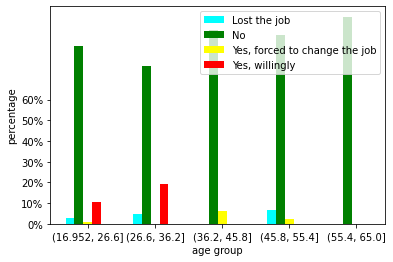

In [65]:
myfun(x = "age_grp",y = "change_pf",xlabel = "age group")

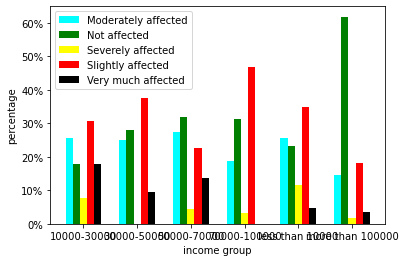

In [26]:
myfun(x = "income",y = "fin_aff" )

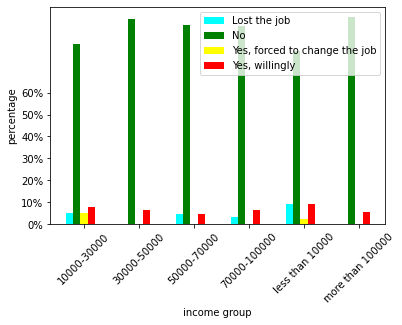

In [48]:
myfun(x = "income",y = "change_pf",rot = 45)

In [ ]:
myfun(x = "income",y = "aff_cov_wrklf")#####income group vs work life

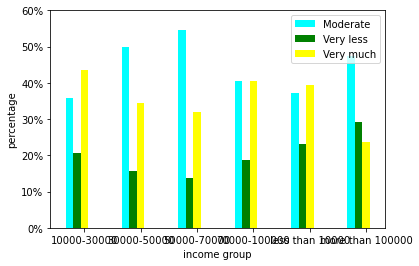

In [29]:
myfun(x = "income",y = "focus_fin")

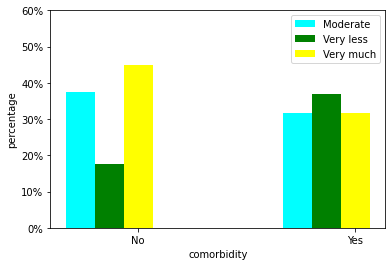

In [30]:
myfun(x = "comorb",y = "focus_ph",xlabel = "comorbidity")

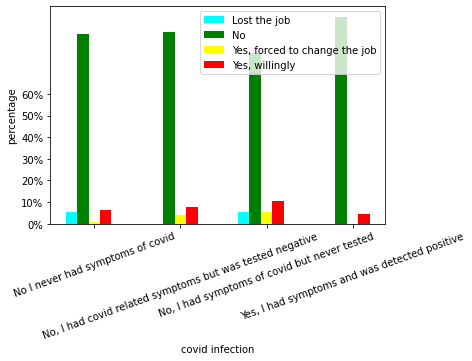

In [36]:
myfun(x = "covidaff",y = "change_pf",xlabel = "covid infection",rot = 20)

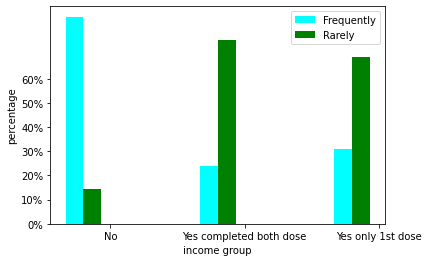

In [32]:
myfun(x = "vaccine",y = "trv_vaca")

In [ ]:
####vaccine dose vs precautions

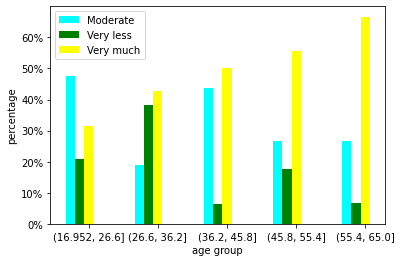

In [37]:
myfun(x = "age_grp",y = "focus_ph",xlabel = "age group")

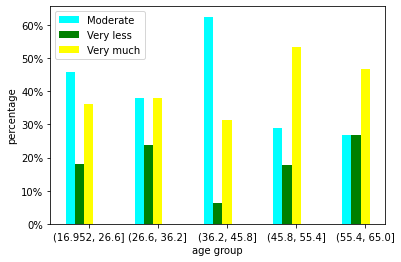

In [38]:
myfun(x = "age_grp",y = "focus_mh",xlabel = "age group")

In [ ]:
#######taking precautions vs covid infection

In [ ]:
########taking precautions while going out for work

In [ ]:
########taking precautions while going out for vacation

In [ ]:
########taking precautions while going out for emergency

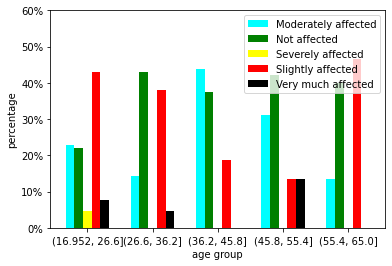

In [39]:
myfun(x = "age_grp",y = "phy_aff",xlabel = "age group")

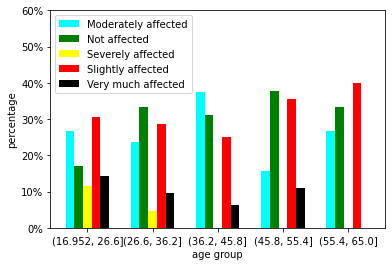

In [40]:
myfun(x = "age_grp",y = "men_aff",xlabel = "age group")

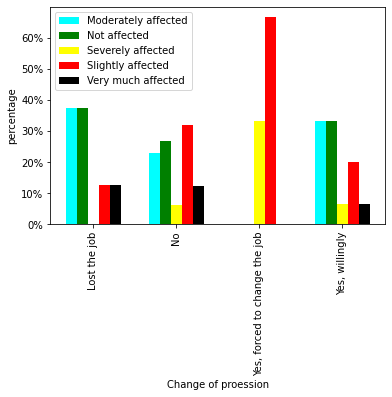

In [45]:
myfun(x = "change_pf",y = "men_aff",xlabel = "Change of proession",rot = 90)

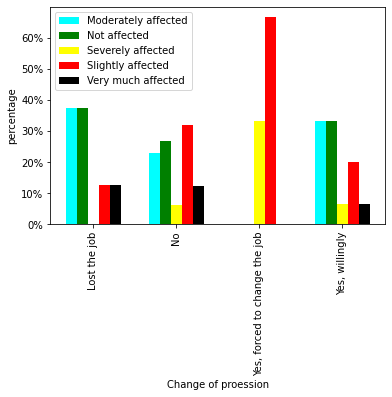

In [46]:
myfun(x = "change_pf",y = "men_aff",xlabel = "Change of proession",rot = 90)